In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
match_data = pd.read_csv("IPL Matches 2008-2020.csv")
ball_data = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")

In [5]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [8]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [9]:
ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [11]:
match_data.shape
ball_data.shape

(193468, 18)

In [12]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [14]:
print('Matches Played so Far:',match_data.shape[0])
print('\n Cities played at:', match_data['city'].unique())
print('\n Total Number of teams participated:', match_data['team1'].unique())

Matches Played so Far: 816

 Cities played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Total Number of teams participated: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [15]:
match_data['Season'] = pd.DatetimeIndex(match_data['date']).year
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [16]:
match_per_season = match_data.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'Matches'})
match_per_season

,Season,Matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


Text(0.5, 1.0, 'Total Matches Played Each Season')

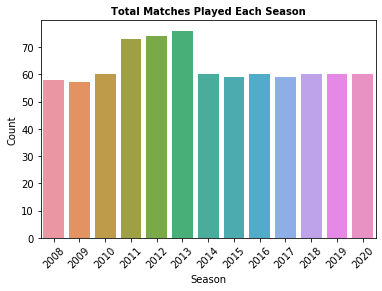

In [17]:
sns.countplot(match_data['Season'])
plt.xticks(rotation =45, fontsize =10)
plt.yticks(fontsize =10)
plt.xlabel('Season',fontsize =10)
plt.ylabel('Count',fontsize=10)
plt.title('Total Matches Played Each Season',fontsize=10,fontweight='bold')

In [19]:
season_data = match_data[['id','Season']].merge(ball_data,left_on ='id', right_on='id', how='left').drop('id',axis=1)
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


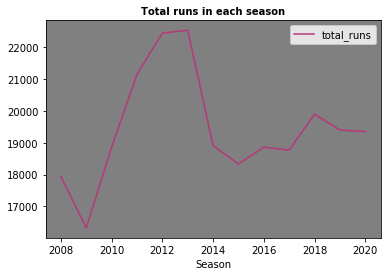

In [26]:
season = season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p= season.set_index('Season')
ax = plt.axes()
ax.set(facecolor ='grey')
sns.lineplot(data = p,palette="magma")
plt.title('Total runs in each season',fontsize=10,fontweight='bold')
plt.show()

In [29]:
runs_per_season = pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per match'] = runs_per_season['total_runs']/runs_per_season['Matches']
runs_per_season.set_index('Season',inplace=True)
runs_per_season

,Matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


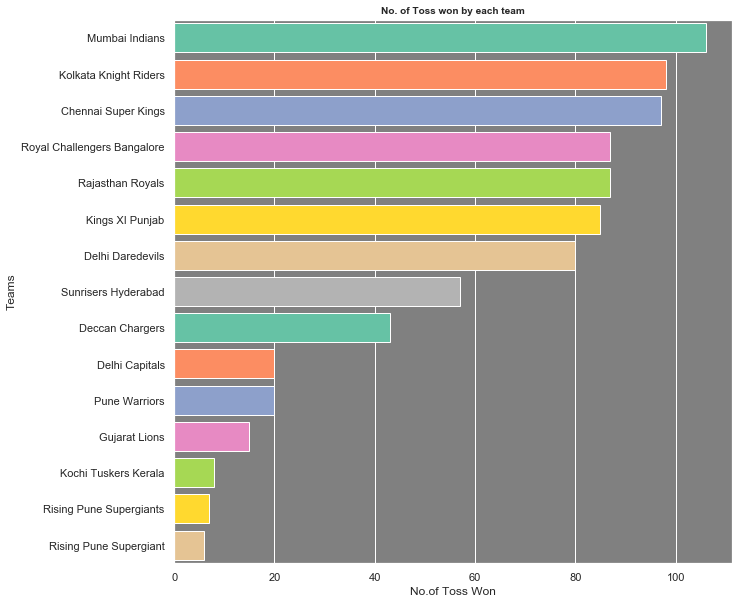

In [43]:
toss = match_data['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor='grey')
sns.set(rc={'figure.figsize':(10,10)},style='darkgrid')
ax.set_title('No. of Toss won by each team', fontsize =10, fontweight='bold')
sns.barplot(y=toss.index, x=toss,orient='h', palette ='Set2', saturation =1)
plt.xlabel('No.of Toss Won')
plt.ylabel('Teams')
plt.show()

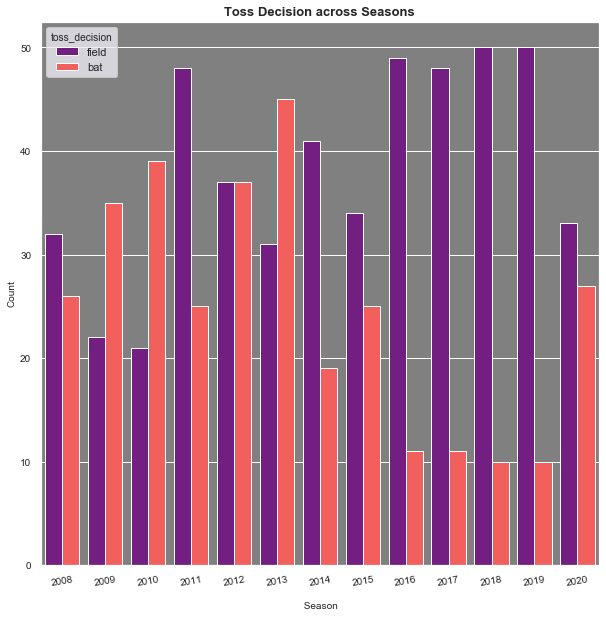

In [48]:
#Toss Decision across seasons
ax = plt.axes()
ax.set(facecolor='grey')
sns.countplot(x='Season', hue ='toss_decision', data=match_data,palette ='magma',saturation=1)
plt.xticks(rotation=10,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Season',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.title('Toss Decision across Seasons', fontsize=13,fontweight='bold')
plt.show()

In [49]:
match_data['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [52]:
#Which Venue is best for bowling 
match_data.venue[match_data.result!='runs'].mode()

0    Eden Gardens
dtype: object

In [53]:
#which venue is best for batting
match_data.venue[match_data.result!='wickets'].mode()

0    Feroz Shah Kotla
dtype: object

In [55]:
#which venue is best when they win the toss
match_data.venue[match_data.toss_winner =='Chennai Super Kings'][match_data.winner=='Chennai Super Kings'].mode()

0    MA Chidambaram Stadium, Chepauk
dtype: object

In [56]:
#which is the best chasing team
match_data.winner[match_data.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
dtype: object

In [57]:
#which is the best defending team
match_data.winner[match_data.result!='wickets'].mode()

0    Mumbai Indians
dtype: object

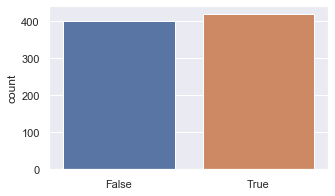

In [61]:
#does winning the toss winnng the match 
toss = match_data['toss_winner'] == match_data['winner']
plt.figure(figsize=(5,3))
sns.countplot(toss)
plt.show()

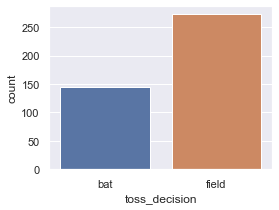

In [63]:
#Does chossing bowling or batting helps in winning
plt.figure(figsize=(4,3))
sns.countplot(match_data.toss_decision[match_data.toss_winner== match_data.winner])
plt.show()

In [65]:
player = (ball_data['batsman']== 'MS Dhoni')
df_dhoni = ball_data[player]
df_dhoni.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
344,335983,1,6,3,MS Dhoni,MEK Hussey,IK Pathan,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
347,335983,1,6,6,MS Dhoni,MEK Hussey,IK Pathan,1,0,1,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
348,335983,1,7,1,MS Dhoni,MEK Hussey,JR Hopes,0,0,0,0,1,lbw,MS Dhoni,NaN,NaN,Chennai Super Kings,Kings XI Punjab
1624,335989,1,19,2,MS Dhoni,JDP Oram,MA Khote,0,1,1,0,0,NaN,NaN,NaN,legbyes,Chennai Super Kings,Mumbai Indians
1625,335989,1,19,5,MS Dhoni,JDP Oram,MA Khote,0,0,0,0,1,caught,MS Dhoni,DJ Bravo,NaN,Chennai Super Kings,Mumbai Indians


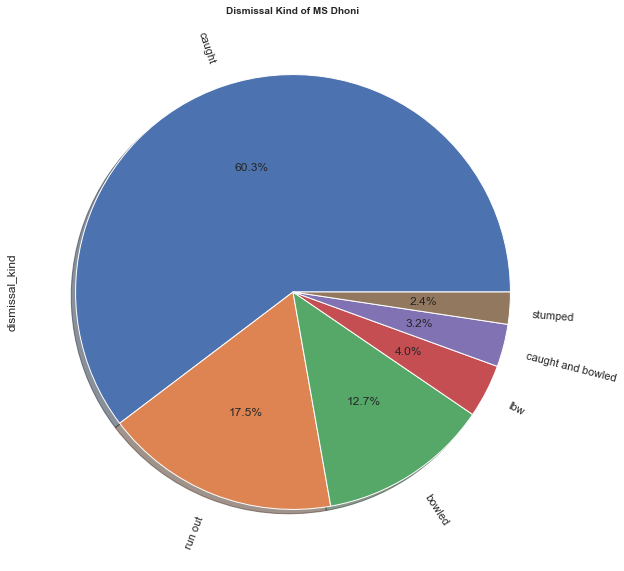

In [68]:
df_dhoni['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title('Dismissal Kind of MS Dhoni',fontweight='bold',fontsize=10)
plt.show()

In [69]:
def count(df_dhoni,runs):
    return len(df_dhoni[df_dhoni['batsman_runs']==runs])*runs

In [73]:
print("Runs scored in 1's :",count(df_dhoni,1))
print("Runs scored in 2's :",count(df_dhoni,2))
print("Runs scored in 3's :",count(df_dhoni,3))
print("Runs scored in 4's :",count(df_dhoni,4))
print("Runs scored in 6's :",count(df_dhoni,6))

Runs scored in 1's : 1409
Runs scored in 2's : 630
Runs scored in 3's : 45
Runs scored in 4's : 1252
Runs scored in61's : 1296


In [74]:
#The match had won by biggest winning margin 
match_data[match_data['result_margin']== match_data['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [76]:
#Plyaers scored more runs in IPl
runs = ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns = ['Batsman','Runs']
y = runs.sort_values(by='Runs',ascending= False).head(10).reset_index().drop('index',axis=1)
y

,Batsman,Runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


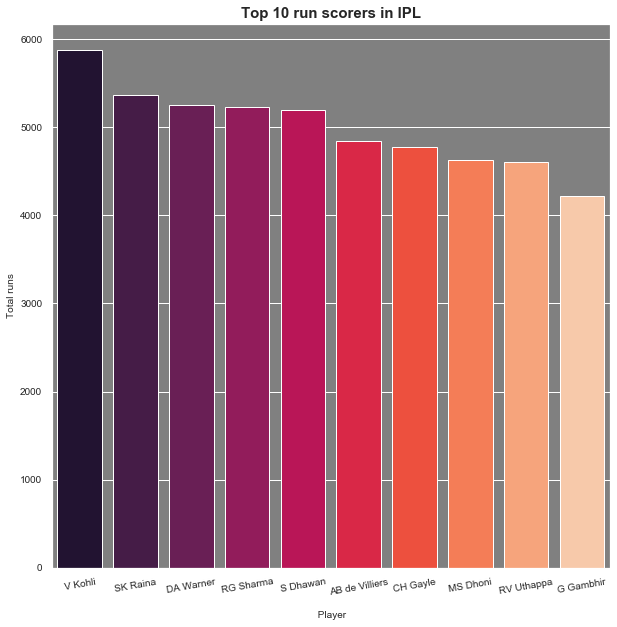

In [83]:
ax = plt.axes()
ax.set(facecolor='grey')
sns.barplot(x=y['Batsman'],y=y['Runs'],palette='rocket',saturation=1)
plt.xticks(rotation=10,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player', fontsize=10)
plt.ylabel('Total runs', fontsize=10)
plt.title('Top 10 run scorers in IPL', fontsize=15,fontweight='bold')
plt.show()

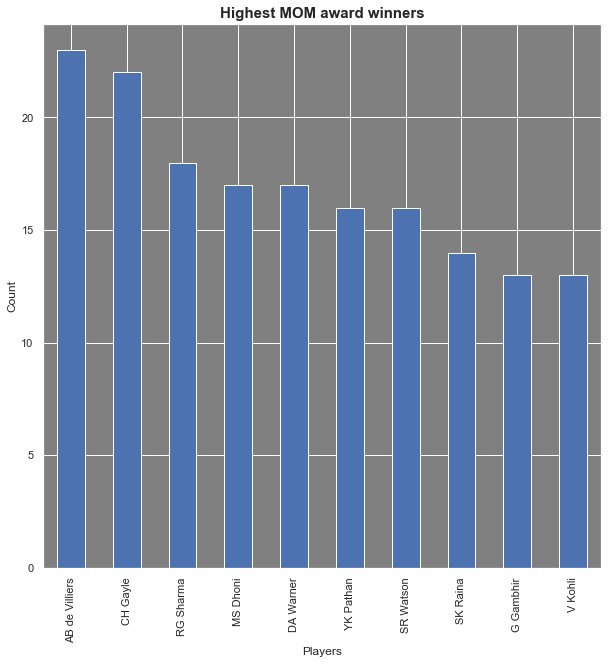

In [85]:
#players won the man of the match most times
ax= plt.axes()
ax.set(facecolor='grey')
match_data.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel('Players')
plt.ylabel('Count')
plt.title('Highest MOM award winners',fontsize=15,fontweight='bold')
plt.show()